In [6]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [7]:
path = "../videos/short.mp4"

In [8]:
cap = cv2.VideoCapture(path)


## Treure la foto de fons

In [4]:
fotograms = list()

In [6]:
i = 0 
while cap.isOpened():
    succes, frame = cap.read()
    
    
    if succes:
        # if i % 10 == 0:
        fotograms.append(frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
        i += 1
    else:break

In [7]:
matrix_video = np.array(fotograms)
matrix_video.shape

(7288, 960, 540, 3)

In [8]:
matrix_video_path = "../videos/short.npy"

with open(matrix_video_path, "wb") as f:
    np.save(f, matrix_video)

In [9]:
matrix_video_path = "../videos/short.npy"

with open(matrix_video_path, "rb") as f:
    matrix_video = np.load(f)

In [11]:
mitjana = matrix_video.mean(axis=0)
mediana = np.median(matrix_video,axis=0)

In [12]:
mitjana = mitjana.astype(np.uint8)
mediana = mediana.astype(np.uint8)

In [13]:
cv2.imwrite("../videos/mitjana.png", mitjana)
cv2.imwrite("../videos/mediana.png", mediana)

True

In [4]:
fons = cv2.imread("../videos/mitjana.png")
matrix_video_path = "../videos/short.npy"
with open(matrix_video_path, "rb") as f:
    matrix_video = np.load(f)

In [30]:
matrix_video = matrix_video - fons

In [6]:
def show_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.show()

In [ ]:
matrix

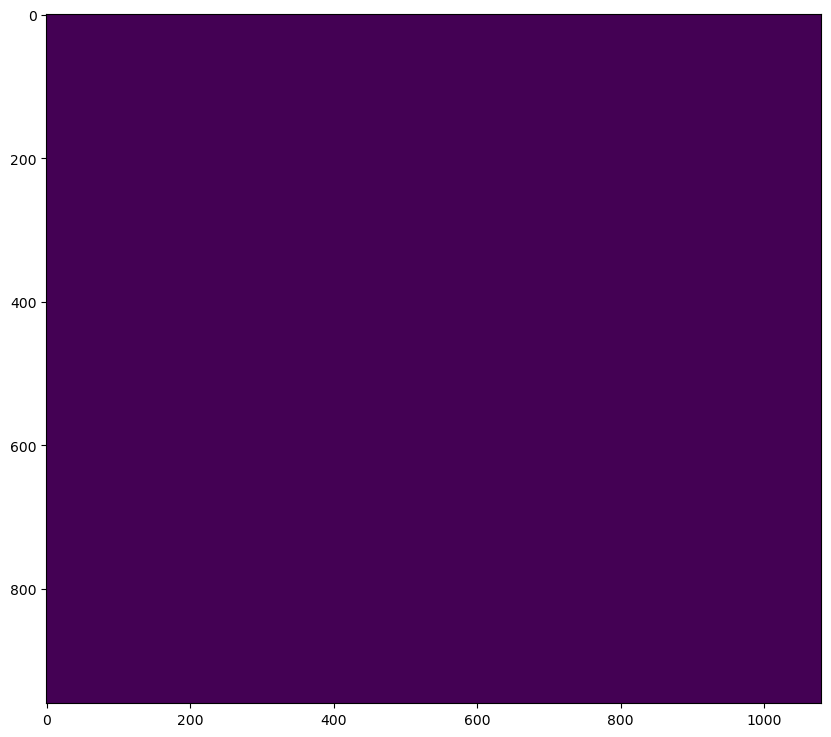

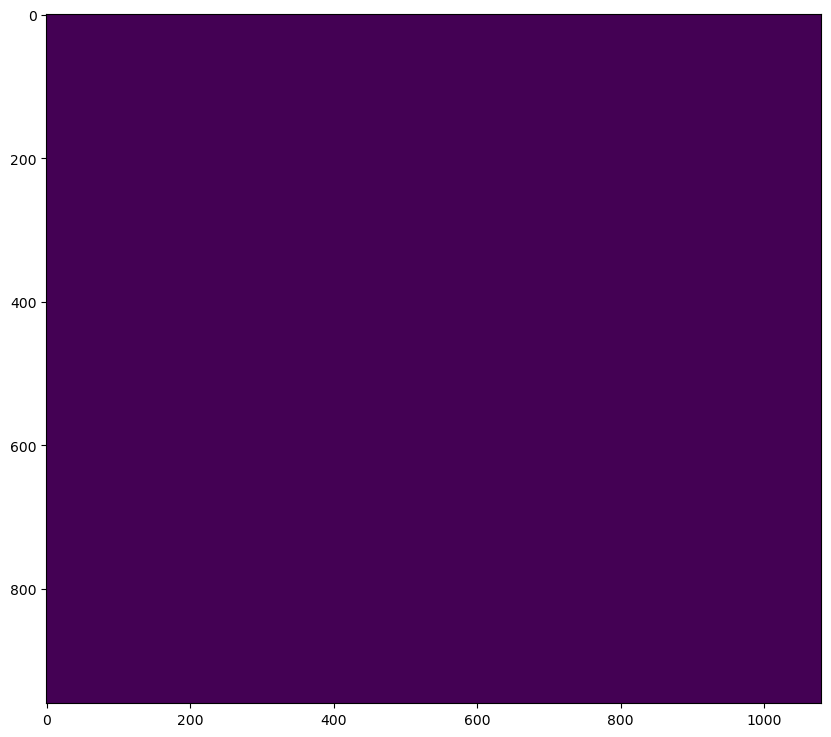

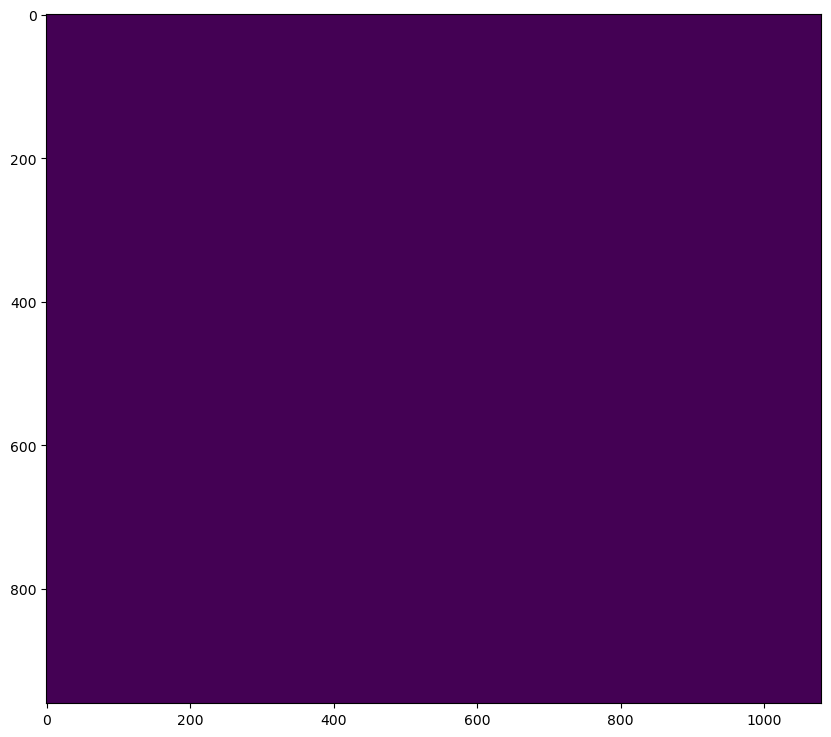

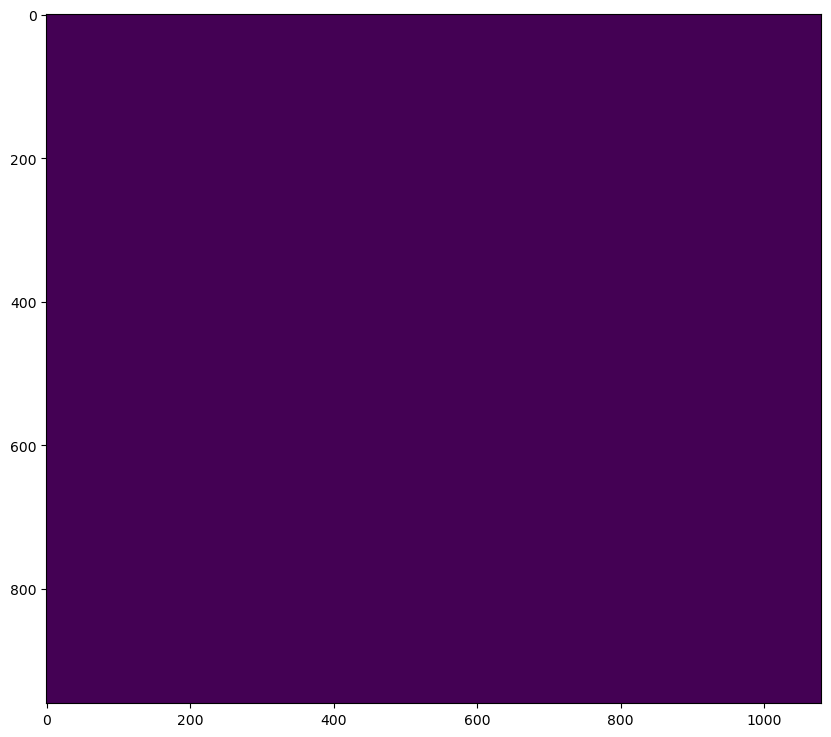

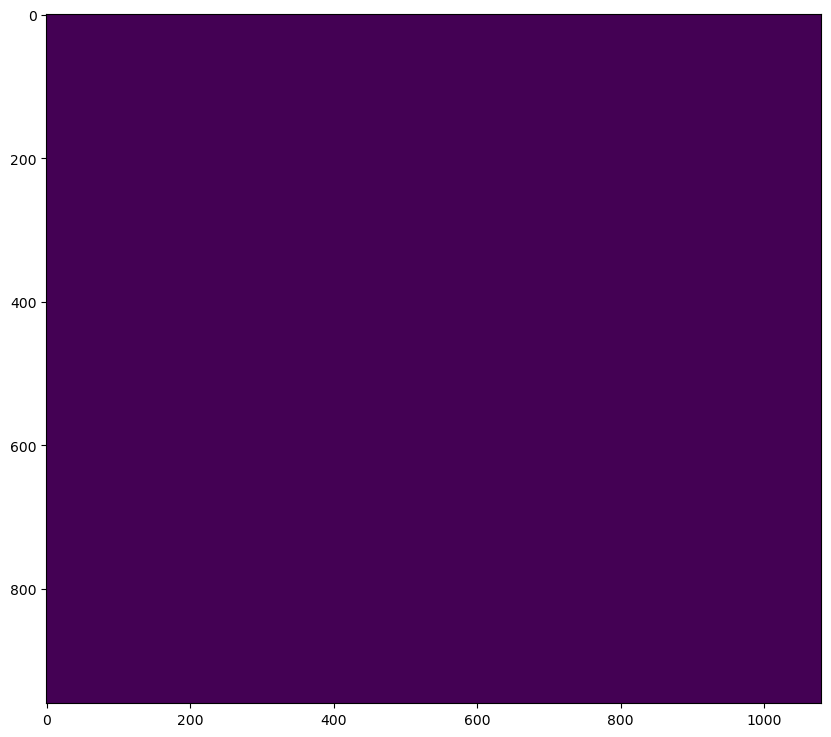

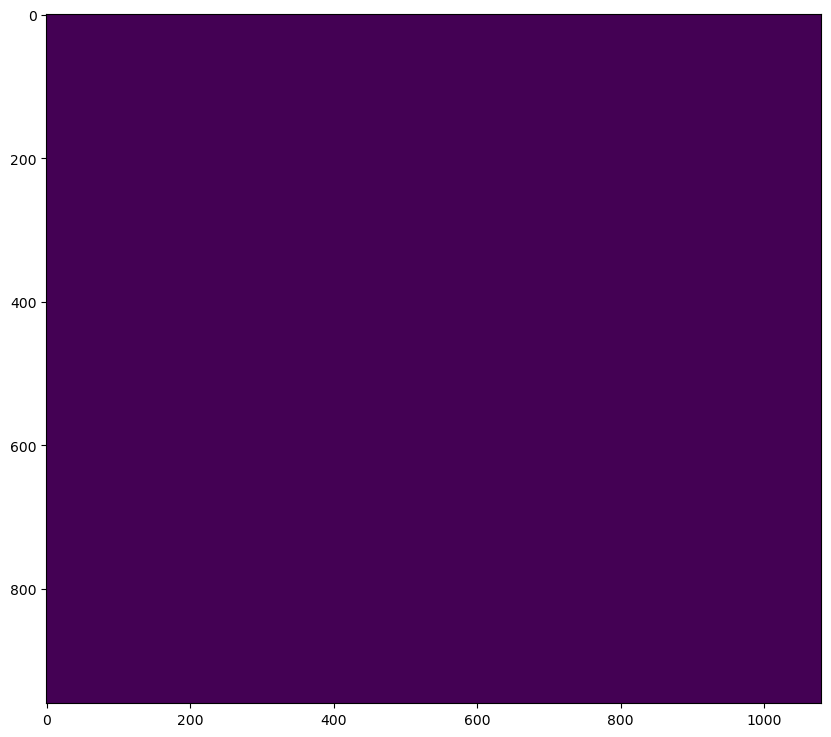

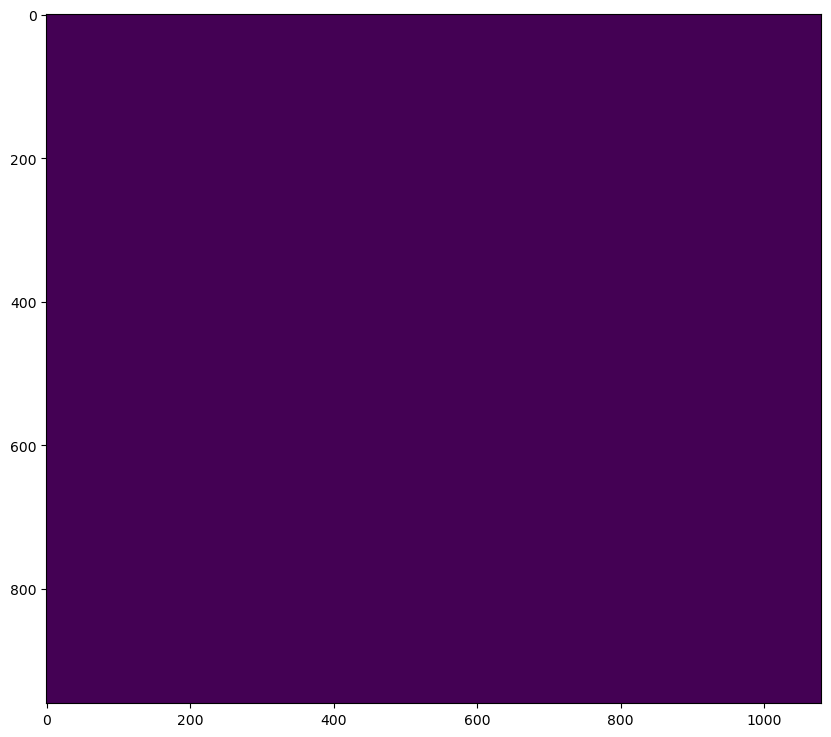

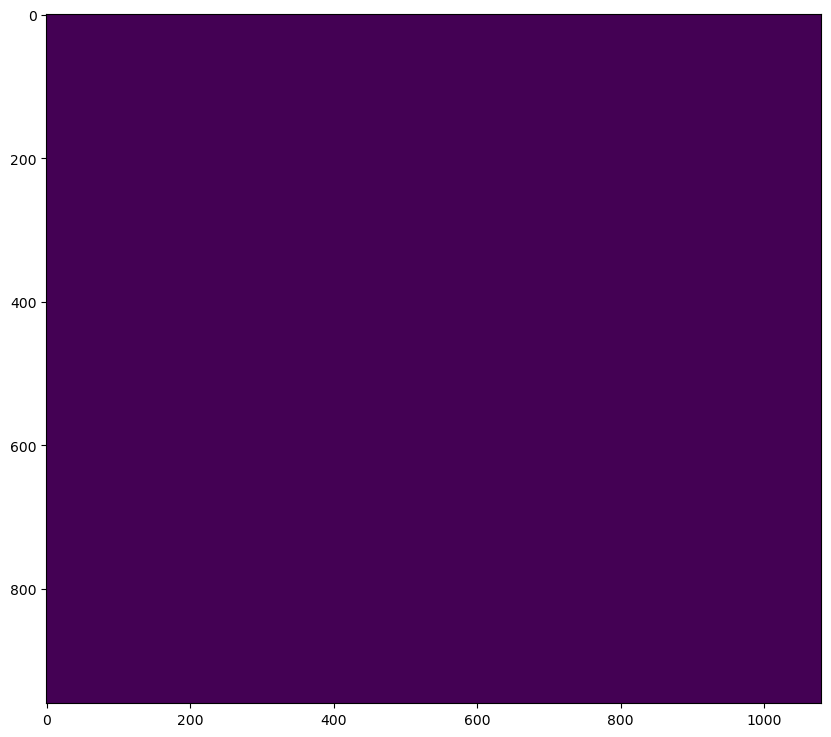

KeyboardInterrupt: 

In [7]:
video = matrix_video[0:30,:,:,:]
background_sub = cv2.createBackgroundSubtractorMOG2()
i = 0
while i <len(video):    
    # read the video frame
    frame = video[i]
  
    # if there are no more frames to show, break the loop

    
    # apply the background subtractor to the frame
    mask = background_sub.apply(frame)
    # apply the opening morphological operation to the mask to remove the noise
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)

    # get the contours of the moving objects
    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    # stack the frame horizontally
    hstacked_frames = np.hstack((mask, opening))
    if i%10 == 0:
        show_image(hstacked_frames)
    # show_image( hstacked_frames)
    
    # if the 'q' key is pressed, stop the loop
    if cv2.waitKey(30) == ord("q"): 
        break